In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from skimage import io, color, transform
import numpy as np
import os

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,silhouette_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from skimage import io, color, transform
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import os


# train preprocess

In [2]:
input_folder = 'C:/Users/Karthick/Downloads/train'
output_folder = 'C:/Users/Karthick/Downloads/prp_train'

os.makedirs(output_folder, exist_ok=True)

def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    desired_width = 224
    desired_height = 224
    resized_image = cv2.resize(img, (desired_width, desired_height))

    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    mean = np.mean(grayscale_image)
    stddev = np.std(grayscale_image)
    normalized_image = (grayscale_image - mean) / stddev

    equalized_image = cv2.equalizeHist(grayscale_image)

    return equalized_image

for subfolder in ['0', '1', '2']:
    input_subfolder = os.path.join(input_folder, subfolder)
    output_subfolder = os.path.join(output_folder, subfolder)

    os.makedirs(output_subfolder, exist_ok=True)

    image_list = os.listdir(input_subfolder)
    for image_name in tqdm(image_list, desc=f'Processing {subfolder}'):
        input_path = os.path.join(input_subfolder, image_name)
        output_path = os.path.join(output_subfolder, image_name)

        processed_image = preprocess_image(input_path)
        cv2.imwrite(output_path, (processed_image * 255).astype(np.uint8))

print("Image preprocessing complete.")


Processing 2: 100%|██████████████████████████████████████████████████████████████████| 190/190 [00:04<00:00, 38.95it/s]

Image preprocessing complete.


# test preprocess

In [3]:
input_folder = 'C:/Users/Karthick/Downloads/test'
output_folder = 'C:/Users/Karthick/Downloads/prp_test'

os.makedirs(output_folder, exist_ok=True)

def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    desired_width = 224
    desired_height = 224
    resized_image = cv2.resize(img, (desired_width, desired_height))

    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    mean = np.mean(grayscale_image)
    stddev = np.std(grayscale_image)
    normalized_image = (grayscale_image - mean) / stddev

    equalized_image = cv2.equalizeHist(grayscale_image)

    return equalized_image

for subfolder in ['0', '1', '2']:
    input_subfolder = os.path.join(input_folder, subfolder)
    output_subfolder = os.path.join(output_folder, subfolder)

    os.makedirs(output_subfolder, exist_ok=True)

    image_list = os.listdir(input_subfolder)
    for image_name in tqdm(image_list, desc=f'Processing {subfolder}'):
        input_path = os.path.join(input_subfolder, image_name)
        output_path = os.path.join(output_subfolder, image_name)

        processed_image = preprocess_image(input_path)
        cv2.imwrite(output_path, (processed_image * 255).astype(np.uint8))

print("Image preprocessing complete.")

Processing 2: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.78it/s]

Image preprocessing complete.


In [4]:
acc_scores = []
prec_scores = []
f1_scores = []

# cnn 

Found 434 images belonging to 3 classes.
Found 108 images belonging to 3 classes.
Epoch 1/10
14/14 [==============================] - 21s 1s/step - loss: 1.0121 - accuracy: 0.5899 - val_loss: 0.7395 - val_accuracy: 0.8148
Epoch 2/10
14/14 [==============================] - 19s 1s/step - loss: 0.2627 - accuracy: 0.8963 - val_loss: 0.4689 - val_accuracy: 0.7963
Epoch 3/10
14/14 [==============================] - 18s 1s/step - loss: 0.2217 - accuracy: 0.9171 - val_loss: 0.5309 - val_accuracy: 0.8056
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.1987 - accuracy: 0.9240 - val_loss: 0.6078 - val_accuracy: 0.7963
Epoch 5/10
14/14 [==============================] - 18s 1s/step - loss: 0.2136 - accuracy: 0.9055 - val_loss: 0.5651 - val_accuracy: 0.8056
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.2192 - accuracy: 0.9078 - val_loss: 0.5961 - val_accuracy: 0.8148
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.1521

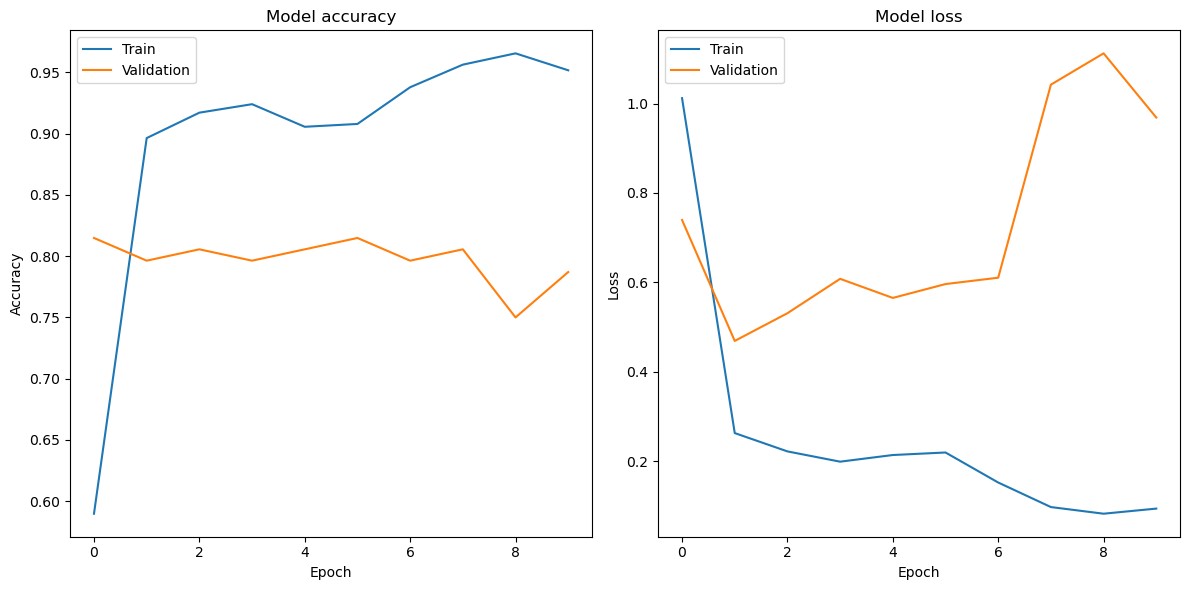

Found 542 images belonging to 3 classes.
17/17 [==============================] - 5s 275ms/step
Confusion Matrix:
[[152   0  10]
 [  0 190   0]
 [ 29   0 161]]


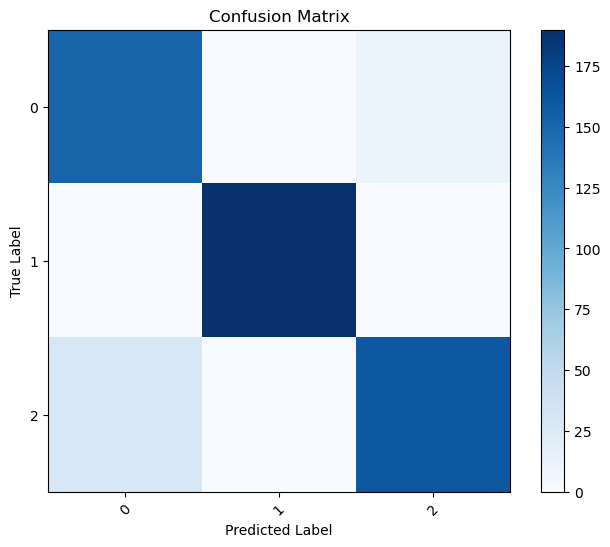

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       162
           1       1.00      1.00      1.00       190
           2       0.94      0.85      0.89       190

    accuracy                           0.93       542
   macro avg       0.93      0.93      0.93       542
weighted avg       0.93      0.93      0.93       542



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_data = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = train_data.flow_from_directory('C:/Users/Karthick/Downloads/prp_train', 
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                subset='training')
validation_generator = train_data.flow_from_directory('C:/Users/Karthick/Downloads/prp_train',
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      subset='validation')

# Define your CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Replace 'number_of_classes' with the actual number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


# Evaluate the model on the test set
test_generator = train_data.flow_from_directory('C:/Users/Karthick/Downloads/prp_train', 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(history)

# Make predictions on the test set
test_generator = train_data.flow_from_directory('C:/Users/Karthick/Downloads/prp_train', 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False)  # Ensure the order of predictions matches the order of true labels

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = train_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(true_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print("Classification Report:")
print(class_report)


1/1 [==============================] - 0s 365ms/step


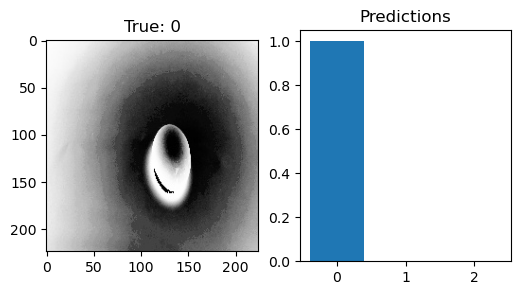

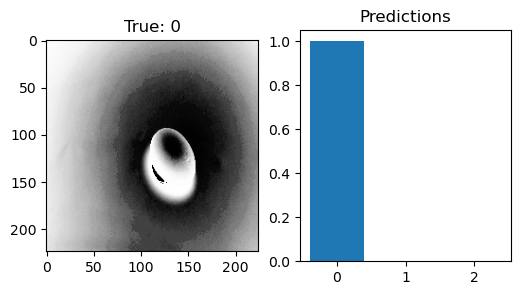

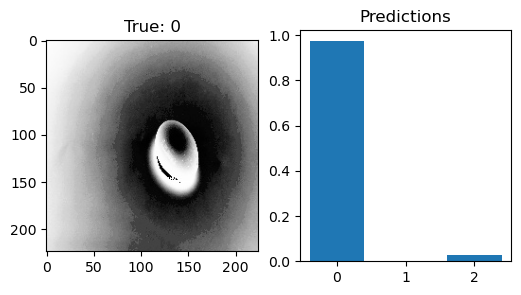

In [6]:
# Visualize predictions on a few images
def visualize_predictions(model, generator, num_images=3):
    class_labels = list(generator.class_indices.keys())
    images, true_labels = next(generator)
    predicted_labels = model.predict(images)

    for i in range(num_images):
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_labels[np.argmax(true_labels[i])]}')

        plt.subplot(1, 2, 2)
        plt.bar(class_labels, predicted_labels[i])
        plt.title('Predictions')
        plt.show()

visualize_predictions(model, test_generator)






# decision tree

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      1.00      1.00        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



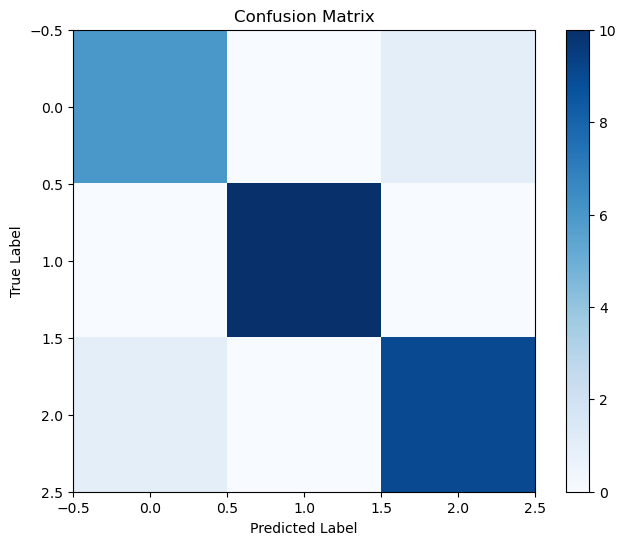

Decision Tree Rules:
|--- 145749 <= 168.00
|   |--- 5037 <= 172.50
|   |   |--- 142042 <= 97.50
|   |   |   |--- class: 0
|   |   |--- 142042 >  97.50
|   |   |   |--- 50767 <= 10.50
|   |   |   |   |--- class: 0
|   |   |   |--- 50767 >  10.50
|   |   |   |   |--- class: 2
|   |--- 5037 >  172.50
|   |   |--- 139315 <= 142.50
|   |   |   |--- class: 0
|   |   |--- 139315 >  142.50
|   |   |   |--- class: 2
|--- 145749 >  168.00
|   |--- class: 1

Class 0 - Precision: 0.86, Recall: 0.86, F1-score: 0.86
Class 1 - Precision: 1.00, Recall: 1.00, F1-score: 1.00
Class 2 - Precision: 0.90, Recall: 0.90, F1-score: 0.90


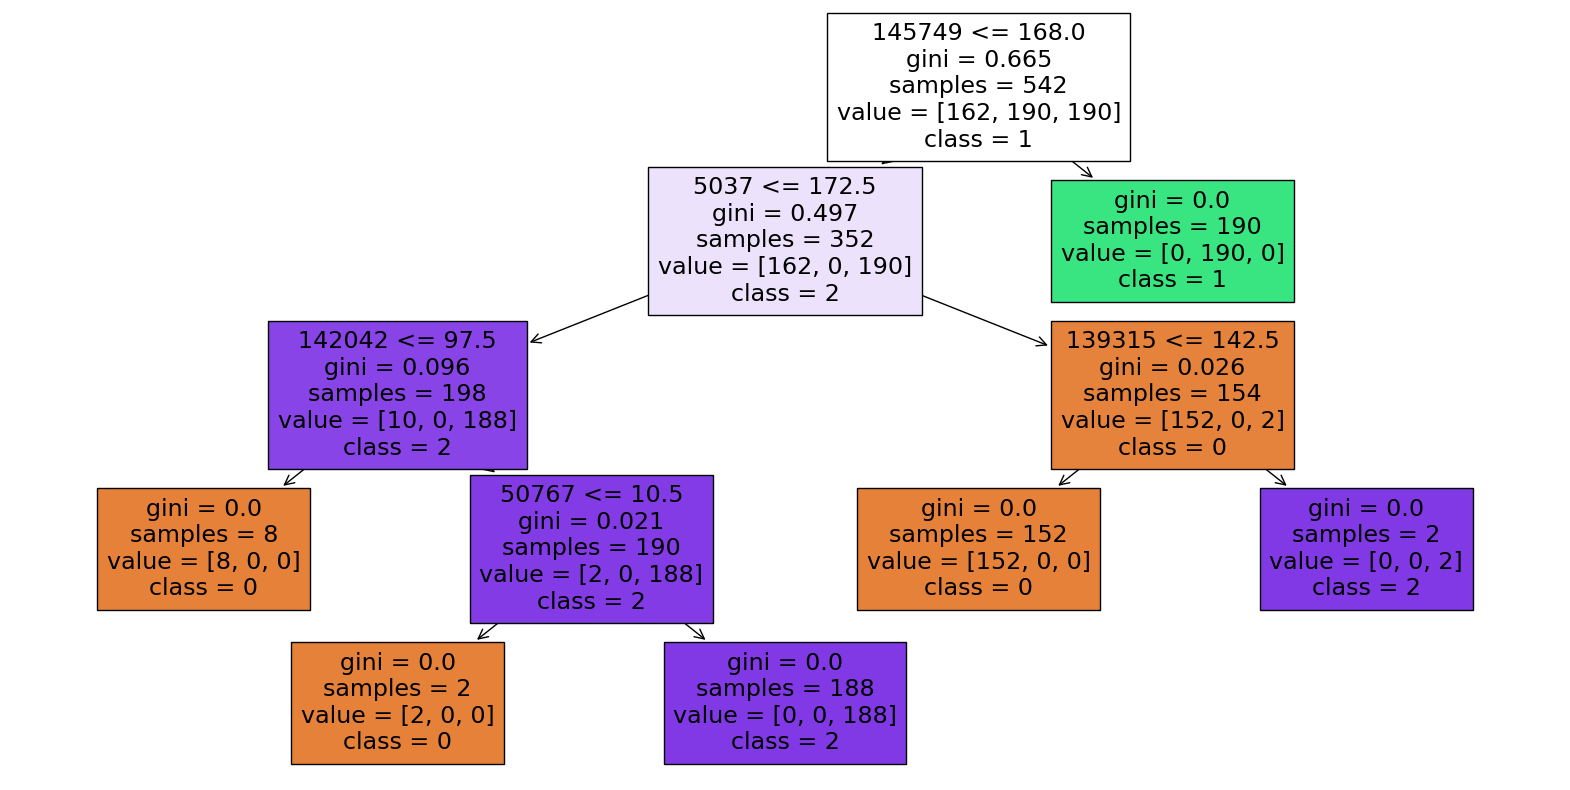

In [7]:
import os
import numpy as np
import cv2
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from preprocess import preprocess_function

def load_and_preprocess_custom_dataset(data_dir, image_size=(8, 8)):
    data = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                data.append(image.flatten())
                labels.append(label)

    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int64)
    return data, labels

# Specify the path to your image folder
image_folder_path = 'C:/Users/Karthick/Downloads/prp_train'

# Load images and labels
X_train, y_train = load_and_preprocess_custom_dataset(image_folder_path)
X_test, y_test = load_and_preprocess_custom_dataset('C:/Users/Karthick/Downloads/prp_test')

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report (includes precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the decision tree
tree_rules = export_text(clf, feature_names=[str(i) for i in range(X_train.shape[1])])
print("Decision Tree Rules:")
print(tree_rules)

# Print F1-score, precision, recall for each class
f1 = f1_score(y_test, y_pred, average=None)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

for i in range(len(f1)):
    print(f"Class {i} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-score: {f1[i]:.2f}")

# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=[str(i) for i in range(X_train.shape[1])], class_names=[str(i) for i in range(10)])
plt.show()


# knn

Accuracy: 0.93
Decision Tree Rules:
|--- 145749 <= 168.00
|   |--- 5037 <= 172.50
|   |   |--- 142042 <= 97.50
|   |   |   |--- class: 0
|   |   |--- 142042 >  97.50
|   |   |   |--- 50767 <= 10.50
|   |   |   |   |--- class: 0
|   |   |   |--- 50767 >  10.50
|   |   |   |   |--- class: 2
|   |--- 5037 >  172.50
|   |   |--- 139315 <= 142.50
|   |   |   |--- class: 0
|   |   |--- 139315 >  142.50
|   |   |   |--- class: 2
|--- 145749 >  168.00
|   |--- class: 1



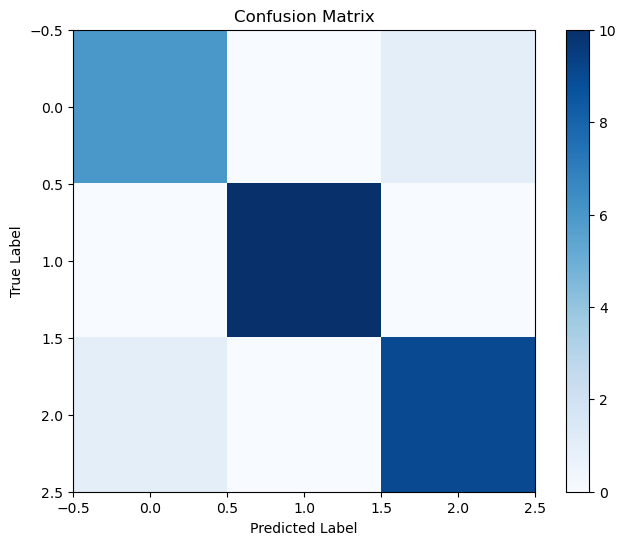

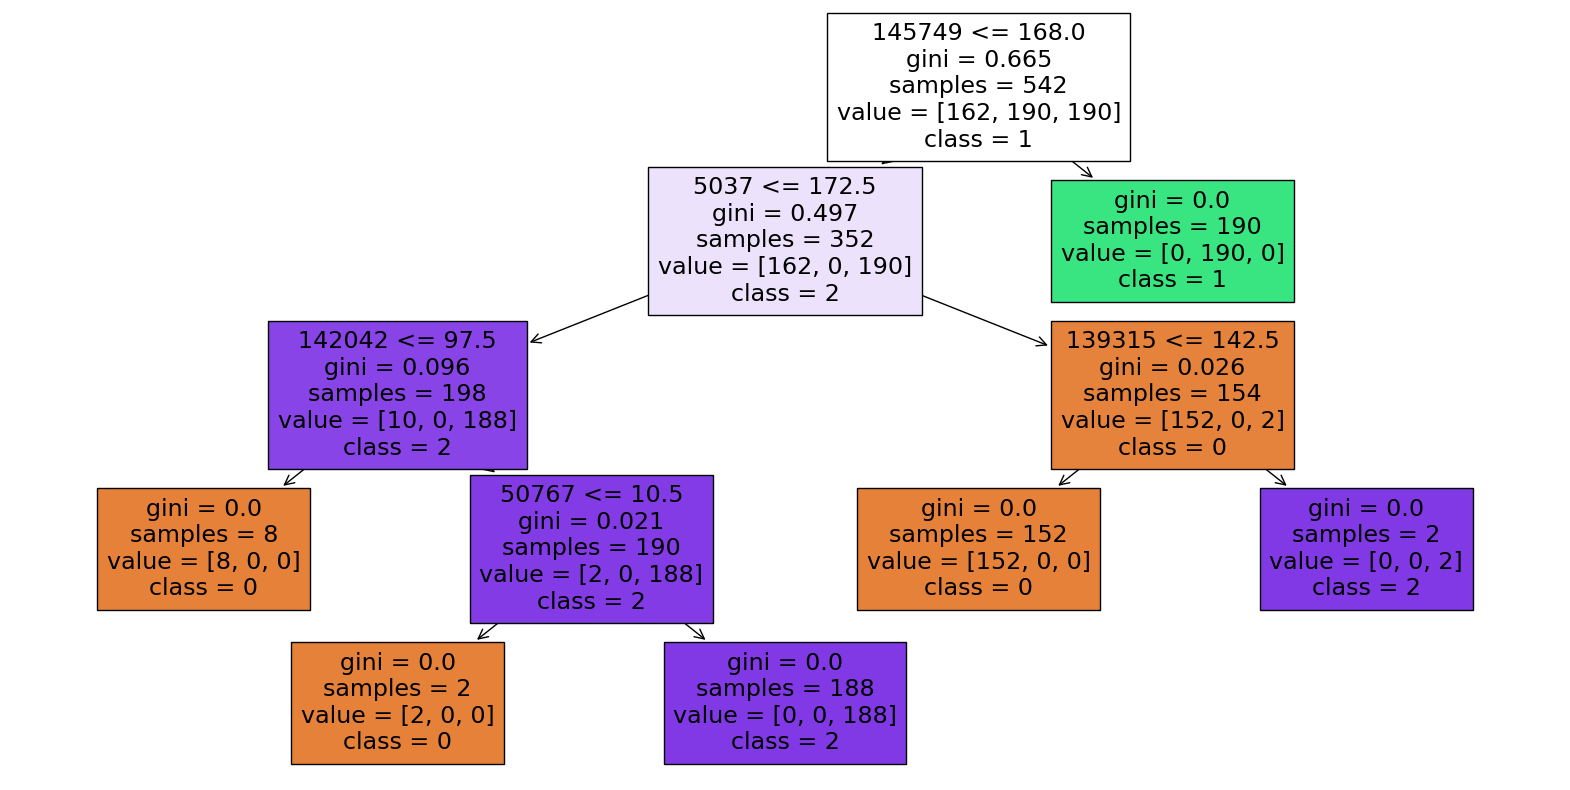

In [8]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
tree_rules = export_text(clf, feature_names=[str(i) for i in range(X_train.shape[1])])
print("Decision Tree Rules:")
print(tree_rules)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=[str(i) for i in range(X_train.shape[1])], class_names=[str(i) for i in range(10)])
plt.show()

In [9]:
def load_and_preprocess_custom_dataset(data_dir, image_size=(8, 8)):
    data = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):   
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                data.append(image.flatten())
                labels.append(label)
    
                
    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int64)
    return data,labels

# Specify the path to your image folder
image_folder_path = 'C:/Users/Karthick/Downloads/prp_train'

In [10]:
# Load and preprocess the dataset
X_train, y_train = load_and_preprocess_custom_dataset('C:/Users/Karthick/Downloads/prp_train')
X_test,y_test = load_and_preprocess_custom_dataset('C:/Users/Karthick/Downloads/prp_test')
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

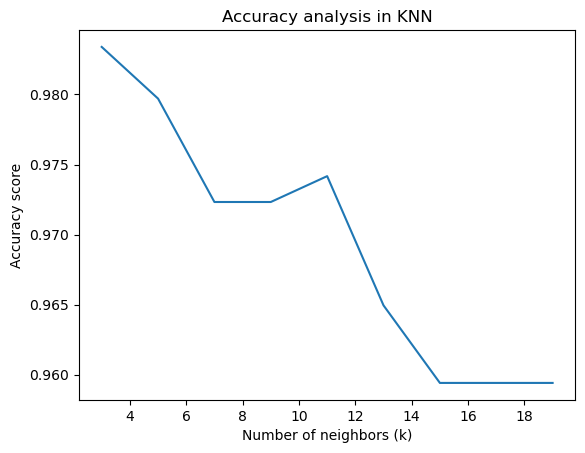

In [11]:

k_values = range(3, 20,2) 
accuracy_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)

    # Predict labels using the fitted KNN model
    predicted_labels = knn_model.predict(X_train)

    # Calculate silhouette score using the predicted labels
    num=0
    den=0
    for l in range(len(y_train)):
        if y_train[l]==predicted_labels[l]:
            num+=1
        den+=1
    
    dfp =  (num/den)
    accuracy_scores.append(dfp)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy score')
plt.title('Accuracy analysis in KNN')
plt.show()

In [14]:

param_grid = {
    'n_neighbors': [3, 5],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
acc2=accuracy



# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred, target_names=['0', '1', '2']))




Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      1.00      1.00        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.92        27
weighted avg       0.94      0.93      0.93        27



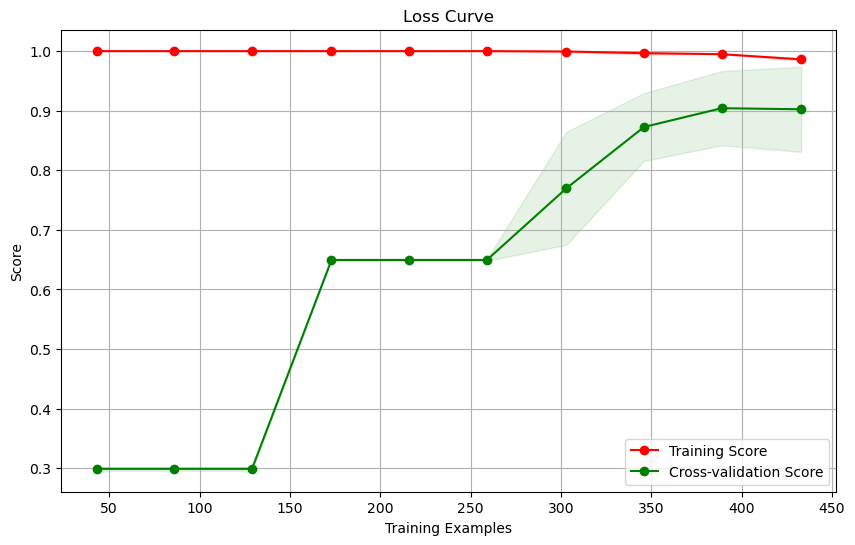

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
knn = KNeighborsClassifier(n_neighbors=3)
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

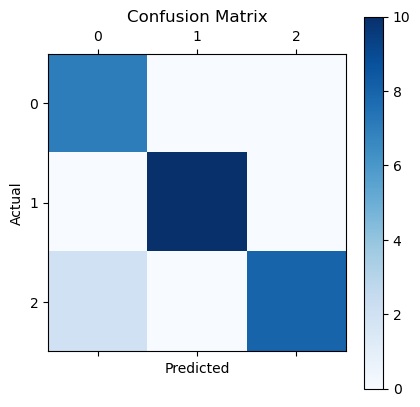

In [16]:
# Create the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.matshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# svm

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from preprocess import preprocess_function

def image_classification_svm(X_train, X_test, y_train, y_test):
    # Use a fixed set of parameters for the SVM model
    clf = svm.SVC(C=1, probability=True)  # You can adjust the C parameter as needed

    # Fit the model
    clf.fit(X_train, y_train)

    # Track decision function values on the training set
    decision_values_train = clf.decision_function(X_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy
    accuracy = np.mean(y_pred == y_test)

    # Generate the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.imshow(confusion_mat, cmap='Blues')
    plt.colorbar()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot the "loss curve" (decision function values)
    plt.plot(decision_values_train, label='Decision Function Values (Training)')
    plt.xlabel('Sample Index')
    plt.ylabel('Decision Function Value')
    plt.legend()
    plt.title('Training Loss Curve')
    plt.show()

    # Print the accuracy and confusion matrix
    print("Accuracy:", accuracy)
    print("Confusion matrix:")
    print(confusion_mat)

    # Generate the classification report
    report = classification_report(y_test, y_pred)
    print(report)

if __name__ == "__main__":
    data_dir = "C:/Users/Karthick/Downloads/prp_train"
    data_dir1 = "C:/Users/Karthick/Downloads/prp_test"
    X_train, y_train = load_and_preprocess_custom_dataset(data_dir, image_size=(8, 8))
    X_test, y_test = load_and_preprocess_custom_dataset(data_dir1, image_size=(8, 8))

    image_classification_svm(X_train, X_test, y_train, y_test)


# naive bayes

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Function to load images from a folder
def load_and_preprocess_custom_dataset(data_dir, image_size=(8, 8)):
    data = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):   
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                data.append(image.flatten())
                labels.append(label)
    
                
    data = np.array(data, dtype=np.float32)
    labels = np.array(labels, dtype=np.int64)
    return data,labels

# Specify the path to your image folder
image_folder_path = 'C:/Users/Karthick/Downloads/prp_train'

# Load images and labels
X, y = load_and_preprocess_custom_dataset(image_folder_path)

# Check if there are enough samples
if len(X) == 0 or len(y) == 0:
    print("Error: Insufficient samples in the dataset.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features (pixel values) to have mean=0 and variance=1
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train a Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gnb.predict(X_test)

    # Evaluate the performance of the classifier
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # You can also print other metrics like confusion matrix and classification report
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

    classification_report = metrics.classification_report(y_test, y_pred)
    print('Classification Report:')
    print(classification_report)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


ac3=12
# creating the dataset
data = {'CNN':acc1, 'KNN':acc2, 'Naive Bayes':ac4}
courses = list(data.keys())
values = list(data.values())
color=['blue','green','orange','brown']
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(courses, values, color =color, width = 0.4)
plt.ylim(0.8,1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Of the Models")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


ac3=12e dataset
data = {'KNN':rec2, 'Naive Bayes':rec4}
courses = list(data.keys())
values = list(data.values())
color=['blue','green','orange','brown']
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(courses, values, color =color, width = 0.4)
plt.ylim(0.8,1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Of the Models")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


data = {'KNN':f1_2, 'Naive Bayes':f1_4}
courses = list(data.keys())
values = list(data.values())
color=['blue','green','orange','brown']
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(courses, values, color =color, width = 0.4)
plt.ylim(0.8,1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Of the Models")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and 3 subplots
fig, axs = plt.subplots(3)

# Plot the distributions
sns.distplot(y_test-y_pred1, ax=axs[0],kde=False)
axs[0].set_title('knn')

sns.distplot(y_test-y_pred2, ax=axs[1],kde=False)
axs[1].set_title('svm')

sns.distplot(y_test-y_pred3, ax=axs[2],kde=False)
axs[2].set_title('naivebayes')

plt.tight_layout()
plt.show()